<a href="https://colab.research.google.com/github/azfar154/Machine-Learning-Traditional-Python/blob/master/Linear_Regression_Least_Squares_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTANT READ ME!!!**
You must connect to a hosted gpu don't use your local environment. 
You can choose to run programs using GPU acceleration or with a TPU



Dark Mode is amazing so like on the top bar go to Tools then Preferences then change the mode to dark.



AZFAR MOHAMED © High School South

Import important Libraries


In [0]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

Make a Linear Regression Set


In [0]:
from sklearn.datasets import make_regression
X_R1,y_R1=make_regression(n_samples=100,n_features=1,n_informative=1,bias=150.0,noise=30,random_state=0)

Make a 75% train and 25% test ratio

In [0]:
X_train,x_test,y_train,y_test=train_test_split(X_R1,y_R1,random_state=0)

Linear Regression Least Squares


In [0]:
from sklearn.linear_model import LinearRegression
#Normal Linear Regression doesn't need an alpha paramter
linreg=LinearRegression().fit(X_train,y_train)
print("The linear coef/w hat is {}".format(linreg.coef_))
print("The intercept/bias term is {}".format(linreg.intercept_))
print("The score for the training data is {:.2f}".format(linreg.score(X_train,y_train)))
print("The score for the testing data is {:.2f}".format(linreg.score(x_test,y_test)))


The linear coef/w hat is [45.70870465]
The intercept/bias term is 148.44575345658873
The score for the training data is 0.68
The score for the testing data is 0.49


Plotting this Linear Regression


In [0]:
plt.figure(figsize=(5,4))
plt.title("Linear Regression:Least Squares")
plt.scatter(X_R1,y_R1,marker='o',s=50,alpha=0.8)
plt.plot(X_R1,X_R1*linreg.coef_+linreg.intercept_,'r-')




<IPython.core.display.Javascript object>

Ridge Regression


In [0]:
from sklearn.linear_model import Ridge
## Ridge Regression uses the L2 penalty which features normalization this is essential when you have features that have a huge impact on the y hat which is the output.
#L2 penalty helps the user for overfitting. Overfitting only benefits the training data. Ridge Regression uses the least squares critera for calculating the W and B but adds a large penalty to the coefficents.
#"In other words, all things being equal, if ridge regression finds two possible linear models that predict the training data values equally well, it will prefer the linear model that has a smaller overall sum of squared feature weights"
ridgeregress=Ridge(alpha=20).fit(X_train,y_train)
print('ridge regression linear model intercept: {}'
     .format(ridgeregress.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(ridgeregress.coef_))
print('R-squared score (training): {:.3f}'
     .format(ridgeregress.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(ridgeregress.score(x_test, y_test)))
print('Number of non-zero features: {}'.format(np.sum(ridgeregress.coef_ !=0)))



ridge regression linear model intercept: 148.48609932907925
ridge regression linear model coeff:
[36.26506226]
R-squared score (training): 0.650
R-squared score (test): 0.545
Number of non-zero features: 1


Finding the "best" alpha variable


In [0]:

for i in [1,10,20,50,100,200]:
  ridgeregress=Ridge(alpha=i).fit(X_train,y_train)
  print("When the alpha is",i)
  print("The score is {:.2f} for the training data".format(ridgeregress.score(X_train,y_train)))
  print("The score is {:.2f} for the training data".format(ridgeregress.score(x_test,y_test)))

When the alpha is 1
The score is 0.68 for the training data
The score is 0.50 for the training data
When the alpha is 10
The score is 0.67 for the training data
The score is 0.53 for the training data
When the alpha is 20
The score is 0.65 for the training data
The score is 0.55 for the training data
When the alpha is 50
The score is 0.57 for the training data
The score is 0.52 for the training data
When the alpha is 100
The score is 0.46 for the training data
The score is 0.44 for the training data
When the alpha is 200
The score is 0.32 for the training data
The score is 0.32 for the training data


Ridge Regression with feature normalization

In [0]:
#Scaler helps normalize the training and the test data we can use the MinMaxScaler)
scaler=MinMaxScaler()
x_train_scaled=scaler.fit_transform(X_train)
x_test_scaled=scaler.transform(x_test)
ridgeregressnorm=Ridge(alpha=20.0).fit(x_train_scaled,y_train)

print("Ridge regress noralization scores. Test:{:.2f} \n Training {:.2f}".format(ridgeregressnorm.score(x_train_scaled,y_train),ridgeregressnorm.score(x_test_scaled,y_test)))

Ridge regress noralization scores. Test:0.18 
 Training 0.17


Normalization will help your data.
LOOK AT THE DIFFERENCE BETWEEN THESE GRAPHS


https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02

If you want to find the amount of time to run a cell you can use the function %%time

In [0]:
%%time
6
scaler=MinMaxScaler()
x_train_scaled=scaler.fit_transform(X_train)
x_test_scaled=scaler.transform(x_test)
ridgeregressnorm=Ridge(alpha=20.0).fit(x_train_scaled,y_train)

print("Ridge regress noralization scores. Test:{:.2f} \n Training {:.2f}".format(ridgeregressnorm.score(x_train_scaled,y_train),ridgeregressnorm.score(x_test_scaled,y_test)))

Ridge regress noralization scores. Test:0.18 
 Training 0.17
CPU times: user 5.92 ms, sys: 217 µs, total: 6.14 ms
Wall time: 5.88 ms


Without an external gpu it is usually impossible to achieve such speeds.

Formula:

Input=(x0,x1...x n)

Function:
y hat= w hat 0 x 0 ... w hat n x n +b hat

y hat is the output

w hat is the model coefficent/slope

b hat is the y intercept

Least Squares
RSS=(y-(w i*x+b)


Least Squares Ridge Regression:

RSS=(y-(w i*x+b)+a wj squared


a wj squared is the alpha L2 which prefers the linear model which has a smaller squared sum of feature weights







Lasso Regression

In [0]:
# In this regression you take the square root of wj rather than squaring it which means that it favors few data with medium/large effect
from sklearn.linear_model import Lasso
lassoregress=Lasso().fit(X_train,y_train)
print("The average score for the training data is {:.2f}".format(lassoregress.score(X_train,y_train)))
print("The average score for the testing data is {:.2f}".format(lassoregress.score(x_test,y_test)))
print("The number of non zero features is {}.".format(np.sum(lassoregress.coef_!=0)))
#With the line of code above you can find if Lasso Regression is what you need for your data

The average score for the training data is 0.68
The average score for the testing data is 0.50
The number of non zero features is 1.


Polynomial Features


In [0]:
#Generates new feature that can match some Addition of many polynomial features often leads to
#overfitting, so we often use polynomial features in combination with regression that has a regularization penalty, like ridge regression. This allows to use a much richer functions that can be used to fit ununsal data
#The degree of the polynomial shows how many variable participate at a time with this feature
from sklearn.preprocessing import PolynomialFeatures
# Making a more complex regression problem where these features are important in
from sklearn.datasets import make_friedman1
X_F1, y_F1 = make_friedman1(n_samples = 100,
                           n_features = 7, random_state=0)
#If doesn't plot copy and paste this into another window
plt.figure()
plt.scatter(X_F1[:, 2], y_F1, marker= 'o', s=50)

<IPython.core.display.Javascript object>

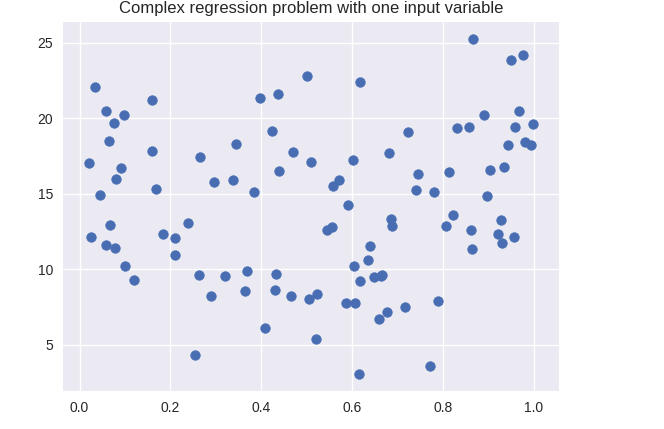

In [0]:
#Lets try doing this with linear regression and polynomial features
poly=PolynomialFeatures(degree=2)
x_f1_poly=poly.fit_transform(X_F1)
X_train, X_test, y_train, y_test = train_test_split(x_f1_poly, y_F1,
                                                   random_state = 0)
linreg=LinearRegression().fit(X_train,y_train)
print("For linear regression the score is:")
print("The training score is {:.2f}".format(linreg.score(X_train,y_train)))
print("The testing score is {:.2f}".format(linreg.score(X_test,y_test)))


##Lets try this with ridgeregression
linridge=Ridge(alpha=2).fit(X_train,y_train)
print("The score for ridge regression is:")
print("The training score is {:.2f}".format(linridge.score(X_train,y_train)))
print("The testing score is {:.2f}".format(linridge.score(X_test,y_test)))
#There is not many medium effecting feature weights


For linear regression the score is:
The training score is 0.97
The testing score is 0.80
The score for ridge regression is:
The training score is 0.78
The testing score is 0.79
